In [1]:
# Importing necessary libraries

import cv2
import numpy as np
import pandas as pd
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers


%matplotlib inline

In [2]:
# Loading all the scrapped images.

images = []
folder = r'C:\Users\91981\Desktop\data'

for filename in os.listdir(folder):
    try:
        img = Image.open(os.path.join(folder, filename))
        img = img.resize((224, 224))
        if img is not None:
            images.append(np.array(img))
    except:
        print('Cant import ' + filename)

# Converting the data into array
X = np.asarray(images)

In [3]:
# Checking the shape of the data
X.shape

(899, 224, 224, 3)

In [4]:
# Loading the image dataset (csv file).

data = pd.read_csv("data.csv")

In [5]:
# Converting the same into array

y = np.asarray(data)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [6]:
# Separating the data into train and test datasets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
# Checking the shape of the splitted data.

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 719
number of test examples = 180
X_train shape: (719, 224, 224, 3)
y_train shape: (719, 1)
X_test shape: (180, 224, 224, 3)
y_test shape: (180, 1)


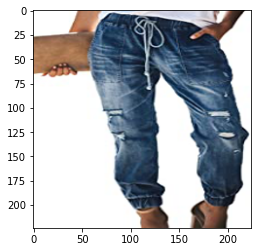

In [8]:
# Visualizing Training data

plt.imshow(images[56])

In [9]:
plt.imshow(images[321])

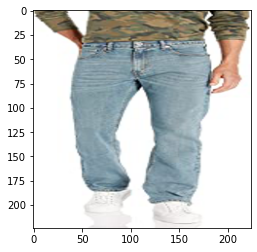

In [10]:
plt.imshow(images[123])

In [11]:
# Creating the model
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0

In [12]:
# Compiling the model

model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [13]:
# Fitting the model

model.fit(X, y, batch_size=32, epochs=30, validation_split=0.1)

Epoch 1/30
26/26 [==============================] - 164s 5s/step - loss: 118.4427 - accuracy: 0.4004 - val_loss: 1.1009 - val_accuracy: 0.3333
Epoch 2/30
26/26 [==============================] - 62s 2s/step - loss: 1.0190 - accuracy: 0.4765 - val_loss: 1.0070 - val_accuracy: 0.6333
Epoch 3/30
26/26 [==============================] - 50s 2s/step - loss: 0.8618 - accuracy: 0.5774 - val_loss: 0.9437 - val_accuracy: 0.3889
Epoch 4/30
26/26 [==============================] - 51s 2s/step - loss: 0.7910 - accuracy: 0.6263 - val_loss: 0.9952 - val_accuracy: 0.2778
Epoch 5/30
26/26 [==============================] - 51s 2s/step - loss: 0.8234 - accuracy: 0.6150 - val_loss: 0.9264 - val_accuracy: 0.6444
Epoch 6/30
26/26 [==============================] - 50s 2s/step - loss: 0.6752 - accuracy: 0.6789 - val_loss: 0.9886 - val_accuracy: 0.3222
Epoch 7/30
26/26 [==============================] - 52s 2s/step - loss: 0.6040 - accuracy: 0.6967 - val_loss: 0.9693 - val_accuracy: 0.0222
Epoch 8/30
26/26 

In [14]:
# Evaluating the model

preds = model.evaluate(x = X_test, y = y_test, verbose=1)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

6/6 [==============================] - 2s 309ms/step - loss: 0.4182 - accuracy: 0.8722

Loss = 0.4181859791278839
Test Accuracy = 0.8722222447395325


In [15]:
# Saving the model.

model.save('Image_classification.h5')

________________________________________________________________________________________________________________________________